<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/tutorial_grind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Tutorial Grind

Nombre: Biología de sistemas 

Fecha: 7 de diciembre

Cargar Grind.R

In [29]:
install.packages("deSolve")
install.packages("FME")
install.packages("rootSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
source("Grind.R")

grind.R was sourced


# Análisis de plano de fase

Modelo de Lotka Volterra

In [46]:
model <- function(time, state, parms) {
  with(as.list(c(state, parms)),{

    dR <- r*R*(1-R/K) - a*R*N
    dN <- c*a*R*N - delta*N

    return(list(c(dR, dN)))
  })
}

En el la ecuación del recurso ($R$) el término $r*R(1-R/K)$ da cuenta de un crecimiento logístico. Mientras que el término $a*R*N$ (ley de acción de masas) implica que el consumo del recurso por el depredador ($N$) es proporcional a la cantidad de recurso. En la ecuación del depredador, el término $c*a*R*N$ implica que la velocidad de crecimiento es proporcional al consumo. Finalmente el término $delta*N$ implica una tasa de muerte constante 

Establecer valor de parámetros y condiciones iniciales

In [47]:
p <- c(r=1, K=1, a=1, c=1, delta=0.5) # vector de parámetros
s <- c(R=1, N=0.01) # vector de condiciones iniciales

Nota importante: las derivadas en la función *model()* deben ser especificadas en el mismo orden que en el vector de condiciones iniciales *s*

Los nombres *model*, *s*, y *p* son las designaciones por dafault para los valores de modelo, estado y parámetros en las funciones de Grind

Correr el modelo y hacer una gráfica de tiempo

R   N 
0.5 0.5

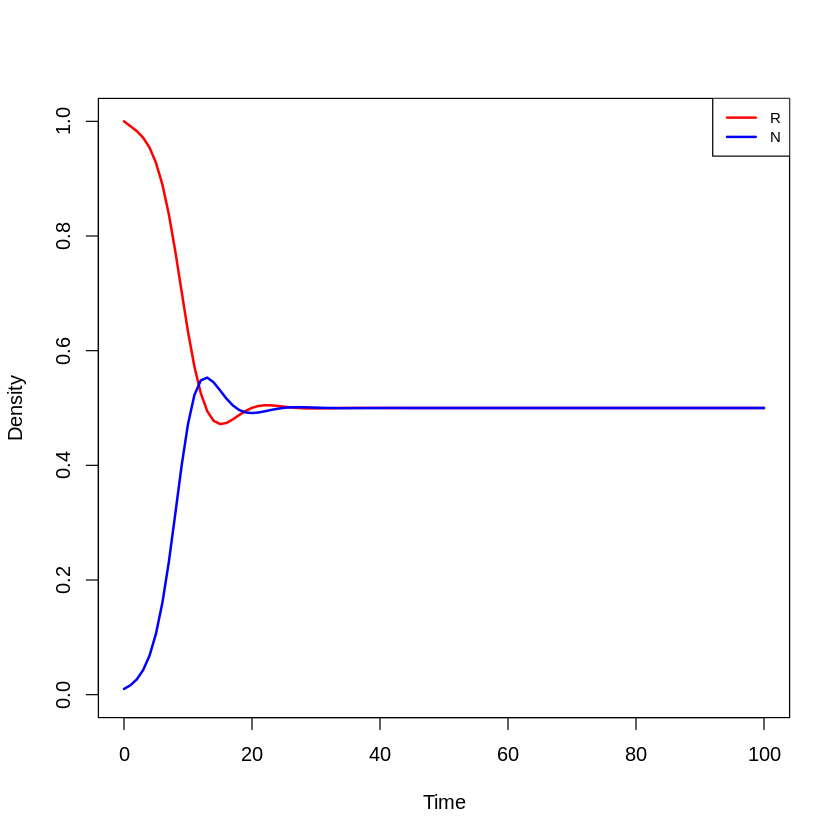

In [48]:
run()

Hacer el plano de fase, mostrando los ejes *x* y *y* de forma completa

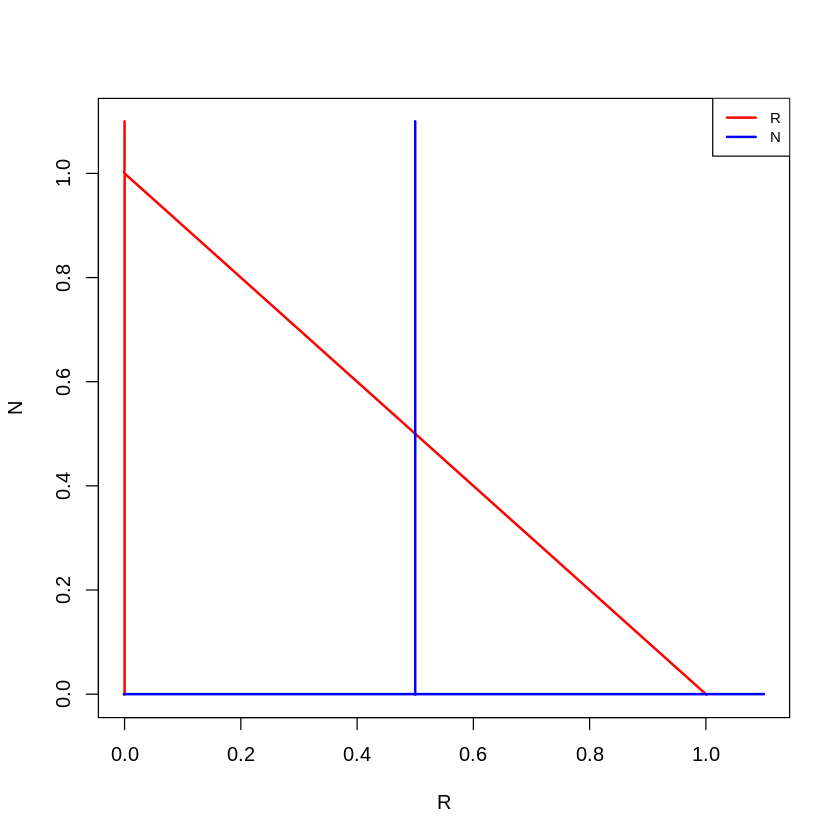

In [49]:
plane(xmin = -0.001, ymin = -0.001)

¿Qué efecto tiene cambiar el parámetro K en el modelo?

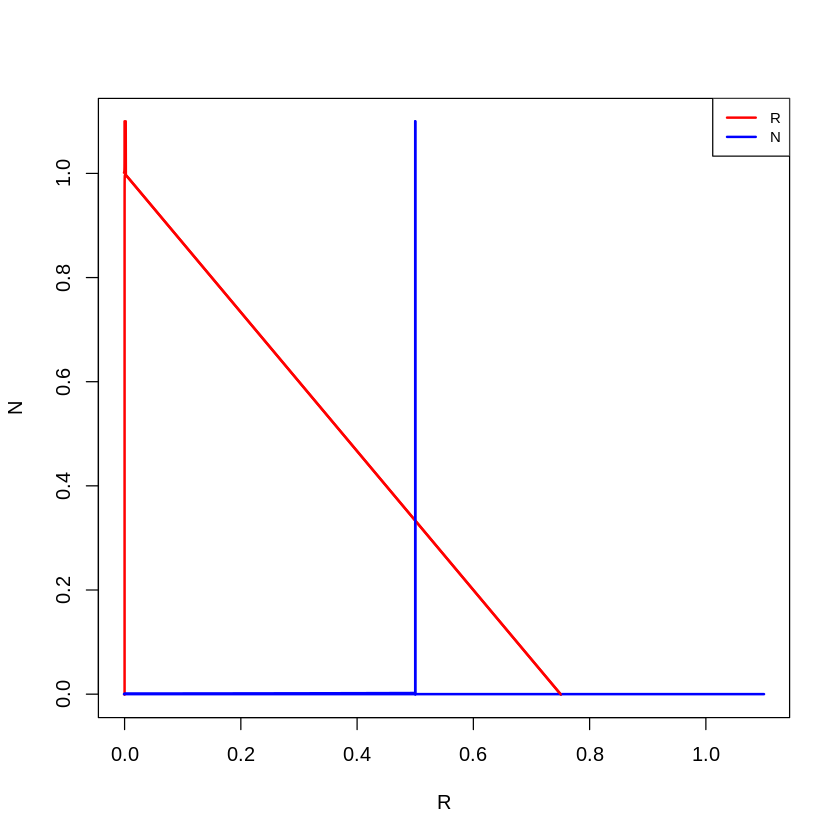

In [54]:
plane(xmin = -0.001, ymin = -0.001)
p["K"] <- 0.75
plane(add = TRUE)

Como puedes observa, modificar el valor de la capacidad de carga del recurso no modifica su valor en el equilibrio ¡pero sí el punto de equilibrio del depredador! :O

¿Cuáles son los puntos de equilibrio?

R         N 
0.5000000 0.3333333

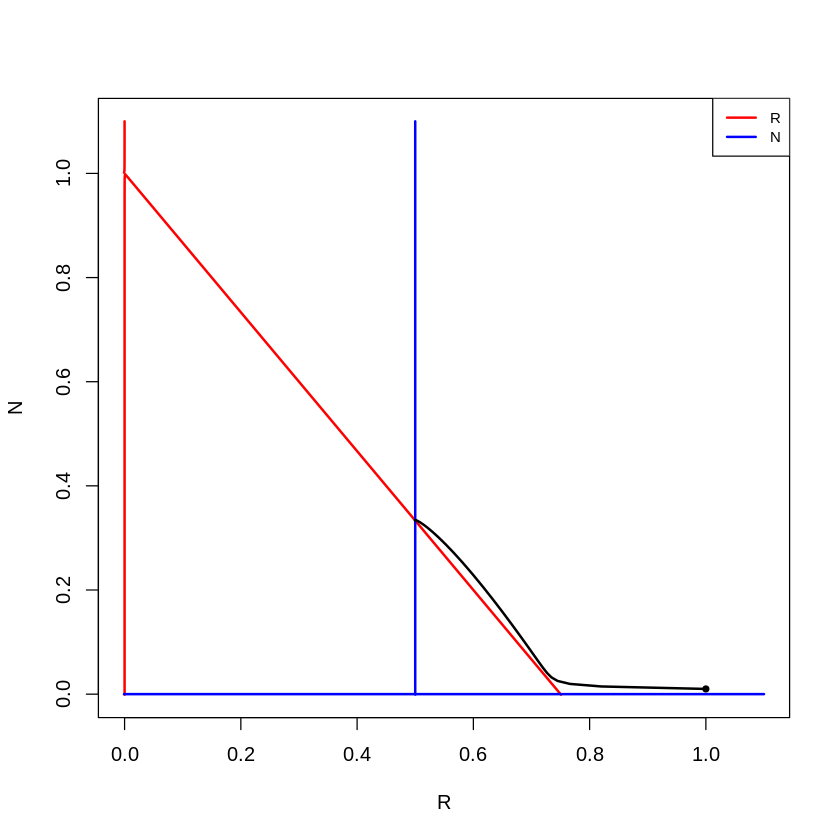

In [56]:
plane(xmin = -0.001, ymin = -0.001)
run(traject = TRUE)

En el plano de fase se observa que existe dos puntos de equilibrio. Para determinar su estabilidad podemos usar el función *newton()*. Para esto debemos dar una condición inicial cercana al punto de equilibrio.  

   R    N 
0.75 0.00 
Unstable point, eigenvalues:  -1 0.25 


R    N 
0.75 0.00

        R         N 
0.5000000 0.3333333 
Stable point, eigenvalues:  -0.3333333+0.2357022i -0.3333333-0.2357022i 


R         N 
0.5000000 0.3333333

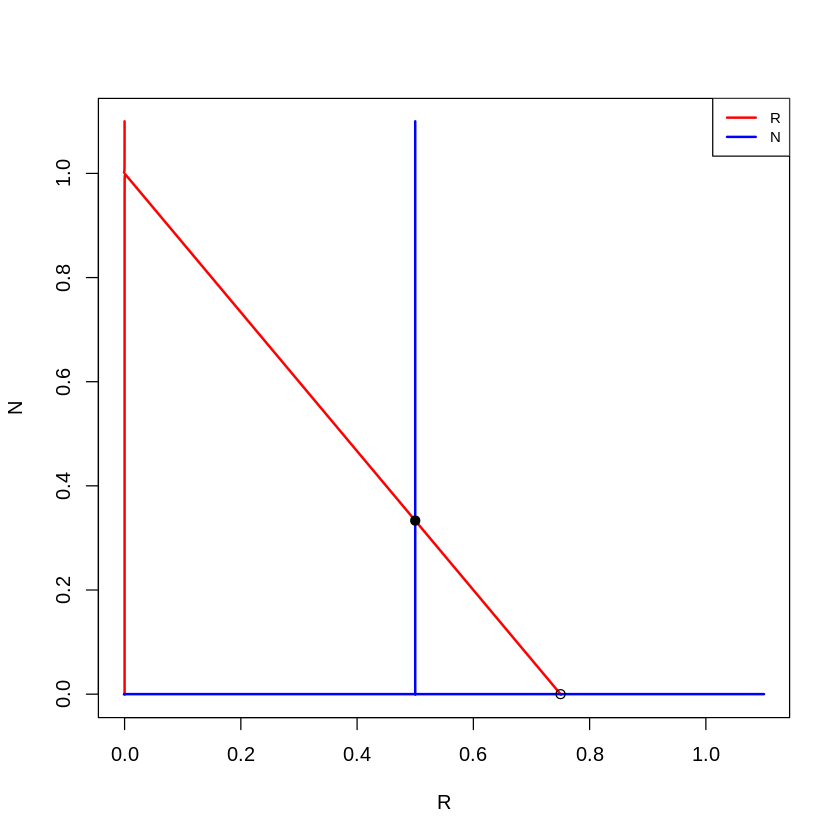

In [57]:
plane(xmin = -0.001, ymin = -0.001)
newton(s, plot = TRUE)
newton(c(R=0.5, N = 0.3), plot = TRUE)

 Con la function *newton()* confirmamos que existe un punto de equilibrio estable en $(R_{ss} = 0.5, N_{ss} = 0.333)$ (la parte real de los eigenvalores es negativa) y un punto de equilibrio inestable en $(R_{ss} = 0.75, N_{ss} = 0)$ (un eigenvalor es positivo). 

¿Cómo depende el punto de equilibrio del valor del parámetro K?

        R         N 
0.5000000 0.3333333 
Stable point, eigenvalues:  -0.3333333+0.2357022i -0.3333333-0.2357022i 
Starting at K = 0.75 with:
        R         N 
0.5000000 0.3333333 
Bifurcation at K = 0.5 


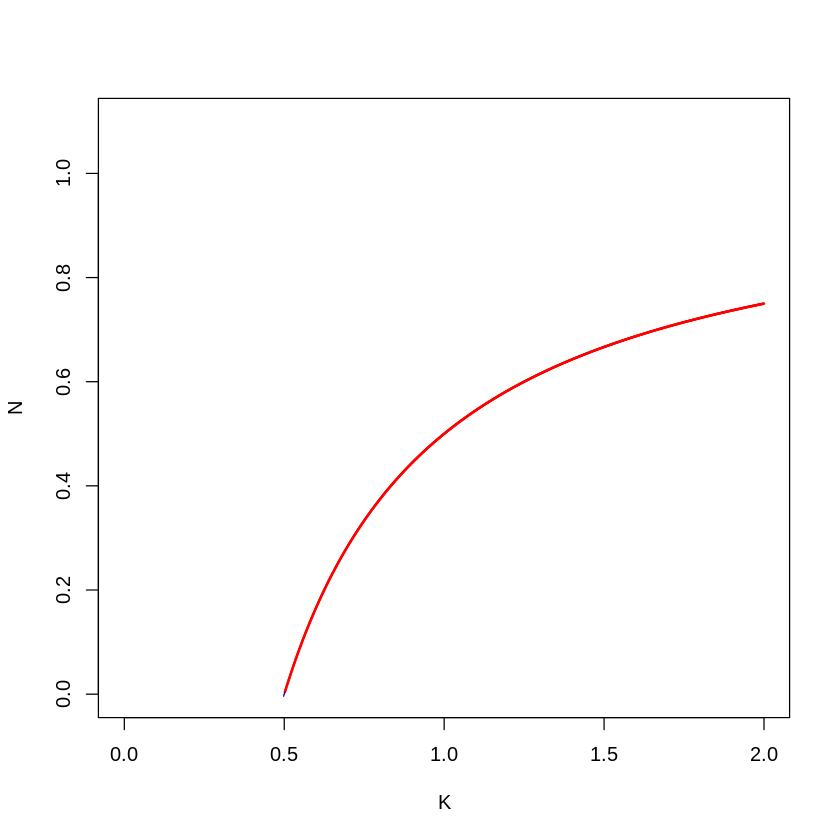

In [60]:
f <- newton(c(R=0.5, N=0.5))
continue(f, x = "K", xmax = 2, y = "N",step=0.001)